Problem - 1: Perform a classification task with knn from scratch.


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Datasets/diabetes.csv");
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


In [ ]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.shape

(768, 9)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

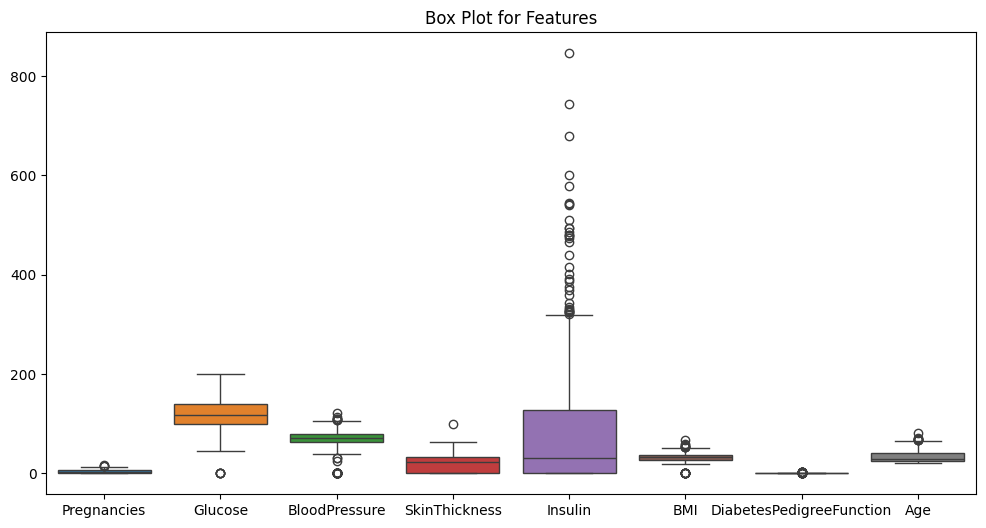

In [45]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.iloc[:, :-1])
plt.title('Box Plot for Features')
plt.show()

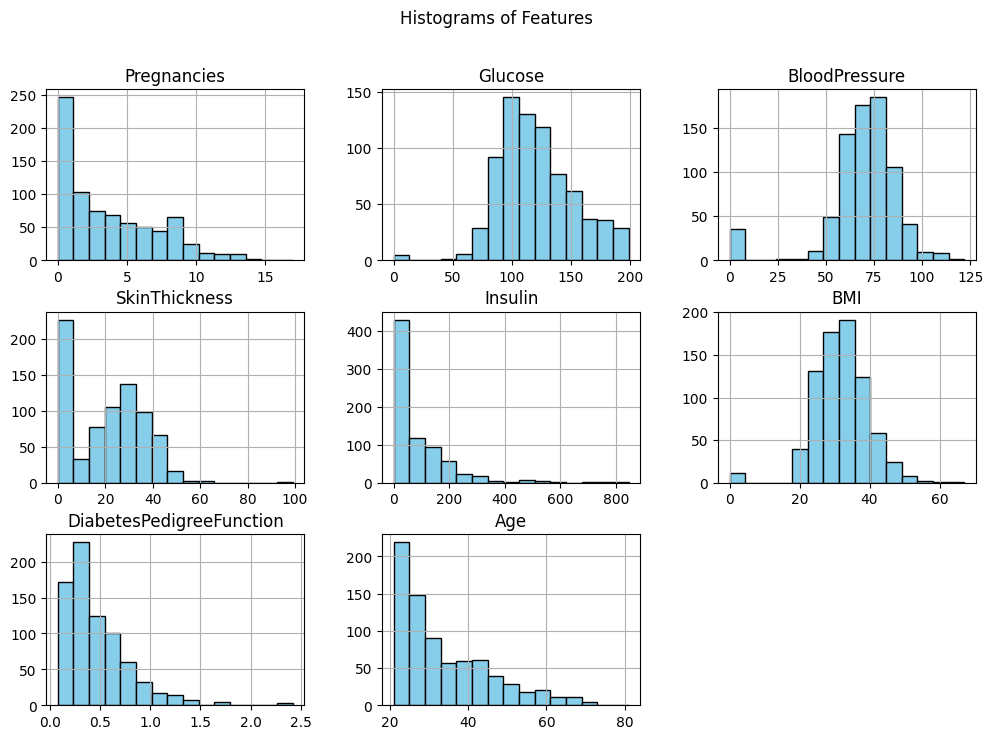

In [ ]:
df.iloc[:, :-1].hist(figsize=(12, 8), bins=15, color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Features')
plt.show()

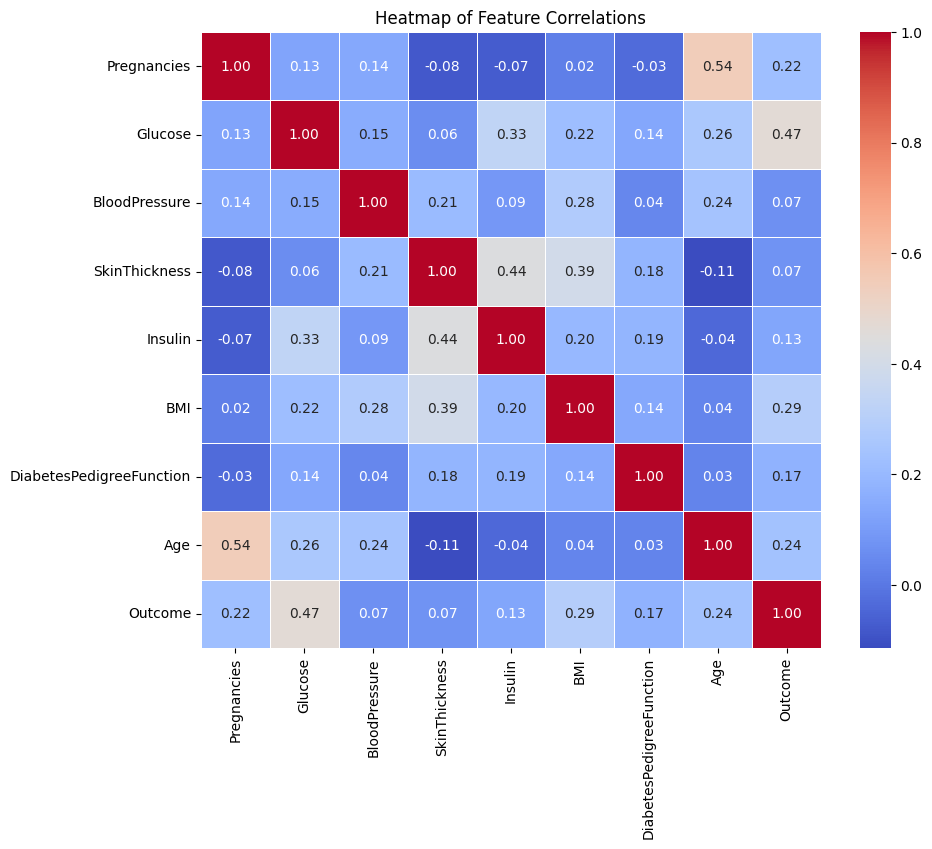

In [ ]:
# Build Heatmaps for appropriate columns
# Compute correlation matrix
corr_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap of Feature Correlations')
plt.show()

Feature Engineering:

In [27]:
X = df.drop(columns=['Outcome']).values
y = df['Outcome'].values
def train_test_split_scratch(X, y, test_size=0.3, random_seed=42):
    """
    Splits dataset into train and test sets.

    Arguments:
    X : np.ndarray
        Feature matrix.
    y : np.ndarray
        Target array.
    test_size : float
        Proportion of the dataset to include in the test split (0 < test_size < 1).
    random_seed : int
        Seed for reproducibility.

    Returns:
    X_train, X_test, y_train, y_test : np.ndarray
        Training and testing splits of features and target.
    """
    np.random.seed(random_seed)
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)  # Shuffle the indices

    test_split_size = int(len(X) * test_size)
    test_indices = indices[:test_split_size]
    train_indices = indices[test_split_size:]

    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = train_test_split_scratch(X, y, test_size=0.3)


print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)




Shape of X_train: (538, 8)
Shape of X_test: (230, 8)
Shape of y_train: (538,)
Shape of y_test: (230,)


In [28]:
def euclidean_distance(point1, point2):
    """
    Calculate the Euclidean distance between two points in n-dimensional space.

    Arguments:
    point1 : np.ndarray
        The first point as a numpy array.
    point2 : np.ndarray
        The second point as a numpy array.

    Returns:
    float
        The Euclidean distance between the two points.

    Raises:
    ValueError: If the input points do not have the same dimensionality.
    """

    if point1.shape != point2.shape:
        raise ValueError("Points must have the same dimensions to calculate Euclidean distance.")


    distance = np.sqrt(np.sum((point1 - point2) ** 2))
    return distance

In [29]:
try:

    point1 = np.array([3, 4])
    point2 = np.array([0, 0])


    result = euclidean_distance(point1, point2)


    expected_result = 5.0
    assert np.isclose(result, expected_result), f"Expected {expected_result}, but got {result}"

    print("Test passed successfully!")
except ValueError as ve:
    print(f"ValueError: {ve}")
except AssertionError as ae:
    print(f"AssertionError: {ae}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Test passed successfully!


In [30]:
def knn_predict_single(query, X_train, y_train, k=3):
    """
    Predict the class label for a single query using the K-nearest neighbors algorithm.

    Arguments:
    query : np.ndarray
        The query point for which the prediction is to be made.
    X_train : np.ndarray
        The training feature matrix.
    y_train : np.ndarray
        The training labels.
    k : int, optional
        The number of nearest neighbors to consider (default is 3).

    Returns:
    int
        The predicted class label for the query.
    """

    distances = [euclidean_distance(query, x) for x in X_train]


    sorted_indices = np.argsort(distances)


    nearest_indices = sorted_indices[:k]


    nearest_labels = y_train[nearest_indices]


    prediction = np.bincount(nearest_labels).argmax()

    return prediction

In [31]:
def knn_predict(X_test, X_train, y_train, k=3):
    """
    Predict the class labels for all test samples using the K-nearest neighbors algorithm.

    Arguments:
    X_test : np.ndarray
        The test feature matrix.
    X_train : np.ndarray
        The training feature matrix.
    y_train : np.ndarray
        The training labels.
    k : int, optional
        The number of nearest neighbors to consider (default is 3).

    Returns:
    np.ndarray
        An array of predicted class labels for the test samples.
    """
    predicitions=[knn_predict_single(x, X_train,y_train,k) for x in X_test]
    return np.array(predicitions)

In [33]:
try:
  X_test_sample=X_test[:5]
  y_test_sample=y_test[:5]
  predictions=knn_predict(X_test_sample,X_train,y_train,k=3)

  print("Predictions: ",predictions)
  print("Actual labels: ",y_test_sample)

  assert predictions.shape==y_test_sample.shape,{
      "The shape of prediction does not match the shape of the actual labels."
  }

  print("Test case passed successfully.")

except AssertionError as ae:
  print(f"AssertionError: {ae}")
except Exception as e:
  print(f"An unexpected error occured:{e}")

Predictions:  [0 1 0 1 1]
Actual labels:  [0 0 0 0 0]
Test case passed successfully.


In [38]:
def compute_accuracy(y_true, y_pred):
    """
    Compute the accuracy of predictions.

    Arguments:
    y_true : np.ndarray
        The true labels.
    y_pred : np.ndarray
        The predicted labels.

    Returns:
    float
        The accuracy as a percentage (0 to 100).
    """
    correct_predictions=np.sum(y_true==y_pred)
    total_predictions=len(y_true)
    accuracy=(correct_predictions/total_predictions)*100
    return accuracy

try:
    predictions=knn_predict(X_test, X_train, y_train,k=3)
    accuracy=compute_accuracy(y_test, predictions)
    print(f"Accuracy of the KNN model on the test set:{accuracy:.2f}%")
except Exception as e:
    print(f"An unexecpted error occured during prediction or accuracy computation:{e}")




Accuracy of the KNN model on the test set:67.39%


Accuracy for k=1: 68.70%
Accuracy for k=2: 72.61%
Accuracy for k=3: 67.39%
Accuracy for k=4: 72.17%
Accuracy for k=5: 68.70%
Accuracy for k=6: 70.00%
Accuracy for k=7: 69.13%
Accuracy for k=8: 71.30%
Accuracy for k=9: 70.00%
Accuracy for k=10: 71.74%
Accuracy for k=11: 73.04%
Accuracy for k=12: 73.91%
Accuracy for k=13: 74.35%
Accuracy for k=14: 72.61%
Accuracy for k=15: 73.91%
Accuracy for k=16: 73.48%
Accuracy for k=17: 72.61%
Accuracy for k=18: 71.30%
Accuracy for k=19: 72.17%
Accuracy for k=20: 70.87%


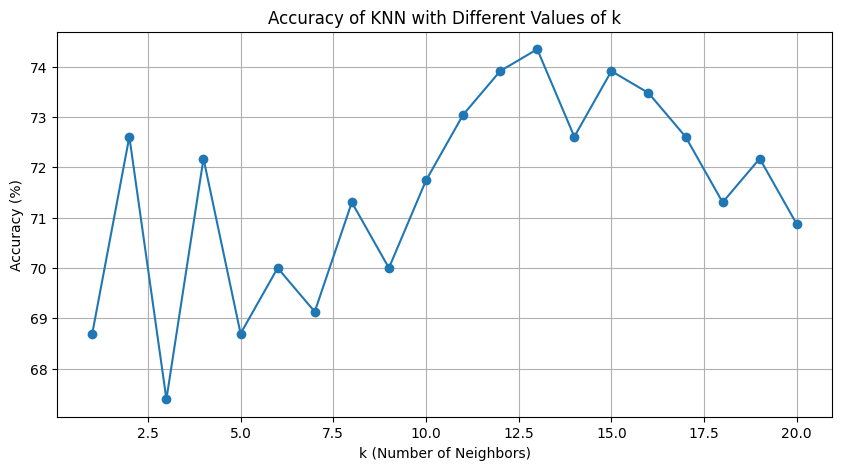

Experiment completed. Check the plot for the accuracy trend.


In [40]:
def experiment_knn_k_values(X_train, y_train, X_test, y_test, k_values):
    """
    Run KNN predictions for different values of k and plot the accuracies.

    Arguments:
    X_train : np.ndarray
        The training feature matrix.
    y_train : np.ndarray
        The training labels.
    X_test : np.ndarray
        The test feature matrix.
    y_test : np.ndarray
        The test labels.
    k_values : list of int
        A list of k values to experiment with.

    Returns:
    dict
        A dictionary with k values as keys and their corresponding accuracies as values.
    """
    accuracies = {}

    for k in k_values:

        predictions = knn_predict(X_test, X_train, y_train, k)

        accuracy = compute_accuracy(y_test, predictions)
        accuracies[k] = accuracy

        print(f"Accuracy for k={k}: {accuracy:.2f}%")


    plt.figure(figsize=(10, 5))
    plt.plot(k_values, list(accuracies.values()), marker='o')
    plt.xlabel('k (Number of Neighbors)')
    plt.ylabel('Accuracy (%)')
    plt.title('Accuracy of KNN with Different Values of k')
    plt.grid(True)
    plt.show()

    return accuracies


k_values = range(1, 21)


try:
    accuracies = experiment_knn_k_values(X_train, y_train, X_test, y_test, k_values)
    print("Experiment completed. Check the plot for the accuracy trend.")
except Exception as e:
    print(f"An unexpected error occurred during the experiment: {e}")


Problem 2

Accuracy on original dataset: 67.39%
Accuracy on scaled dataset: 70.87%


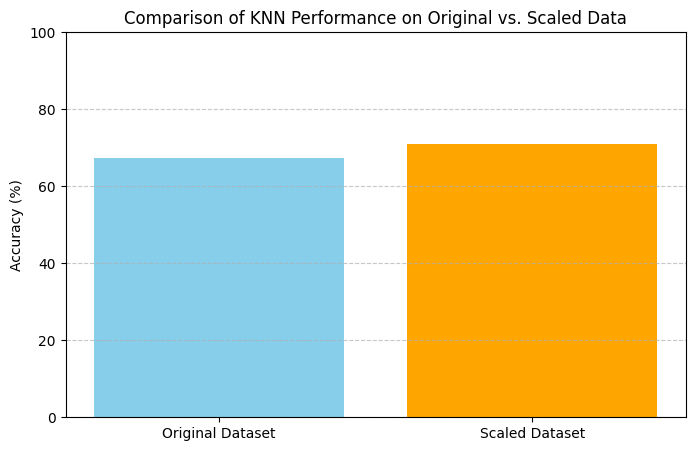

Scaling improved the KNN model's performance.


In [41]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

predictions_original = knn_predict(X_test, X_train, y_train, k=3)
accuracy_original = compute_accuracy(y_test, predictions_original)

predictions_scaled = knn_predict(X_test_scaled, X_train_scaled, y_train, k=3)
accuracy_scaled = compute_accuracy(y_test, predictions_scaled)

print(f"Accuracy on original dataset: {accuracy_original:.2f}%")
print(f"Accuracy on scaled dataset: {accuracy_scaled:.2f}%")

datasets = ['Original Dataset', 'Scaled Dataset']
accuracies = [accuracy_original, accuracy_scaled]

plt.figure(figsize=(8, 5))
plt.bar(datasets, accuracies, color=['skyblue', 'orange'])
plt.ylabel('Accuracy (%)')
plt.title('Comparison of KNN Performance on Original vs. Scaled Data')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

if accuracy_scaled > accuracy_original:
    print("Scaling improved the KNN model's performance.")
elif accuracy_scaled < accuracy_original:
    print("Scaling reduced the KNN model's performance.")
else:
    print("Scaling had no impact on the KNN model's performance.")

Problem 3

Experimenting on Original Dataset:
k=1: Accuracy=68.70%, Time=1.6476 seconds
k=2: Accuracy=72.61%, Time=0.8477 seconds
k=3: Accuracy=67.39%, Time=0.8444 seconds
k=4: Accuracy=72.17%, Time=0.8102 seconds
k=5: Accuracy=68.70%, Time=0.8266 seconds
k=6: Accuracy=70.00%, Time=0.8401 seconds
k=7: Accuracy=69.13%, Time=1.1727 seconds
k=8: Accuracy=71.30%, Time=1.4356 seconds
k=9: Accuracy=70.00%, Time=1.4460 seconds
k=10: Accuracy=71.74%, Time=1.2825 seconds
k=11: Accuracy=73.04%, Time=0.9525 seconds
k=12: Accuracy=73.91%, Time=0.8332 seconds
k=13: Accuracy=74.35%, Time=0.8288 seconds
k=14: Accuracy=72.61%, Time=0.8553 seconds
k=15: Accuracy=73.91%, Time=0.8430 seconds


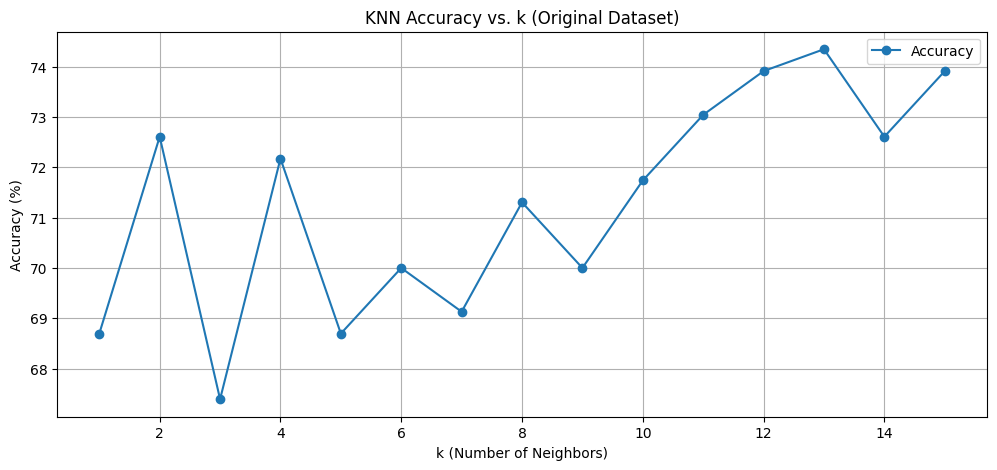

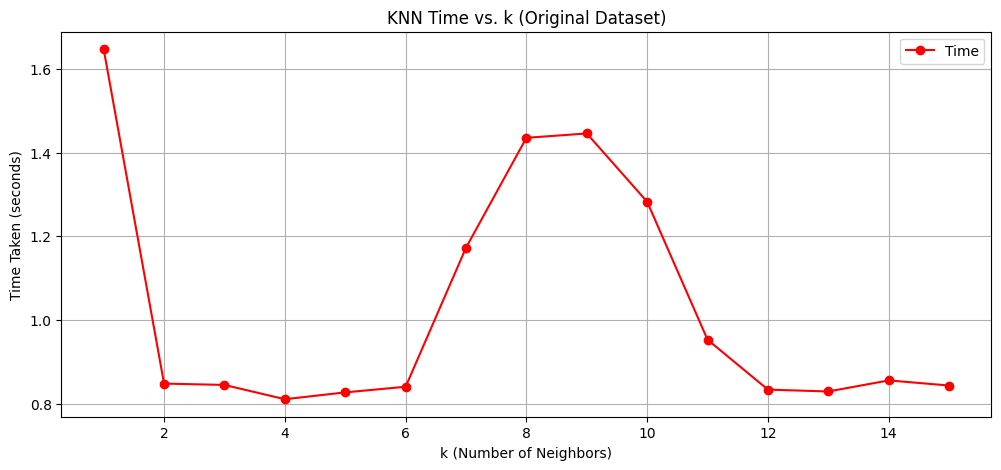


Experimenting on Scaled Dataset:
k=1: Accuracy=63.48%, Time=0.8872 seconds
k=2: Accuracy=66.09%, Time=0.8709 seconds
k=3: Accuracy=70.87%, Time=0.8618 seconds
k=4: Accuracy=68.70%, Time=0.8491 seconds
k=5: Accuracy=70.00%, Time=0.8757 seconds
k=6: Accuracy=69.13%, Time=1.1816 seconds
k=7: Accuracy=69.57%, Time=1.4763 seconds
k=8: Accuracy=68.70%, Time=1.4695 seconds
k=9: Accuracy=69.57%, Time=1.3136 seconds
k=10: Accuracy=69.57%, Time=0.8342 seconds
k=11: Accuracy=70.87%, Time=0.8565 seconds
k=12: Accuracy=72.17%, Time=0.8163 seconds
k=13: Accuracy=71.30%, Time=0.8943 seconds
k=14: Accuracy=71.30%, Time=0.8836 seconds
k=15: Accuracy=73.91%, Time=0.8829 seconds


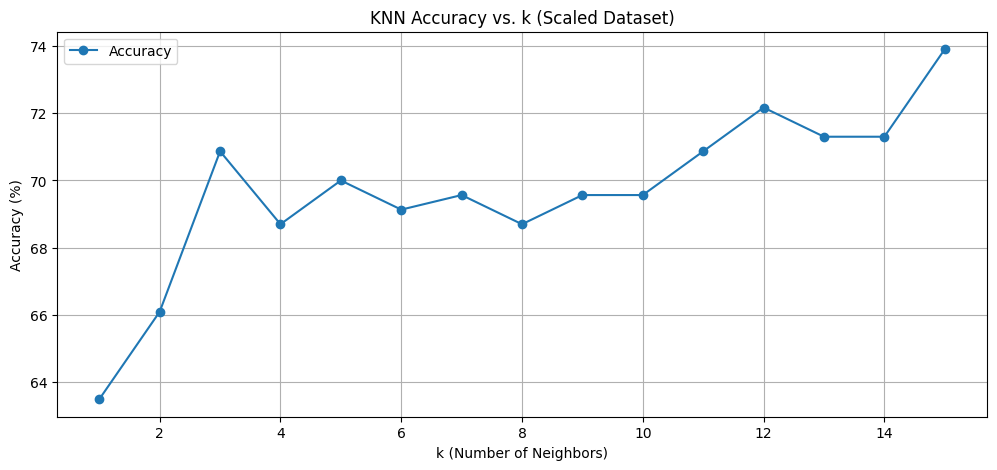

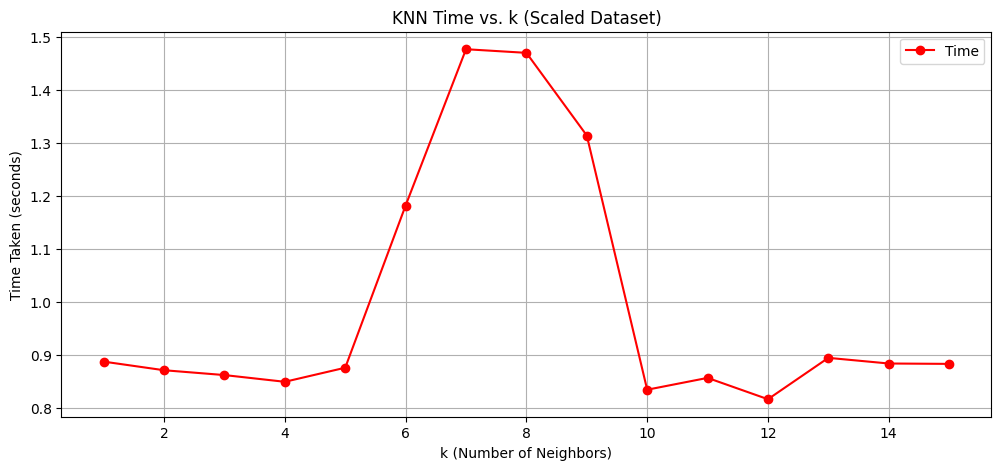

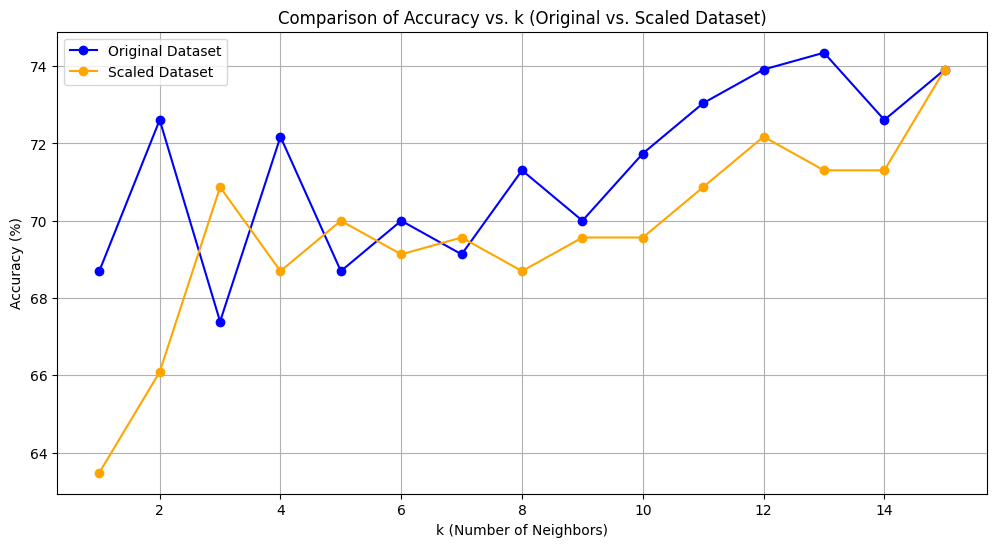

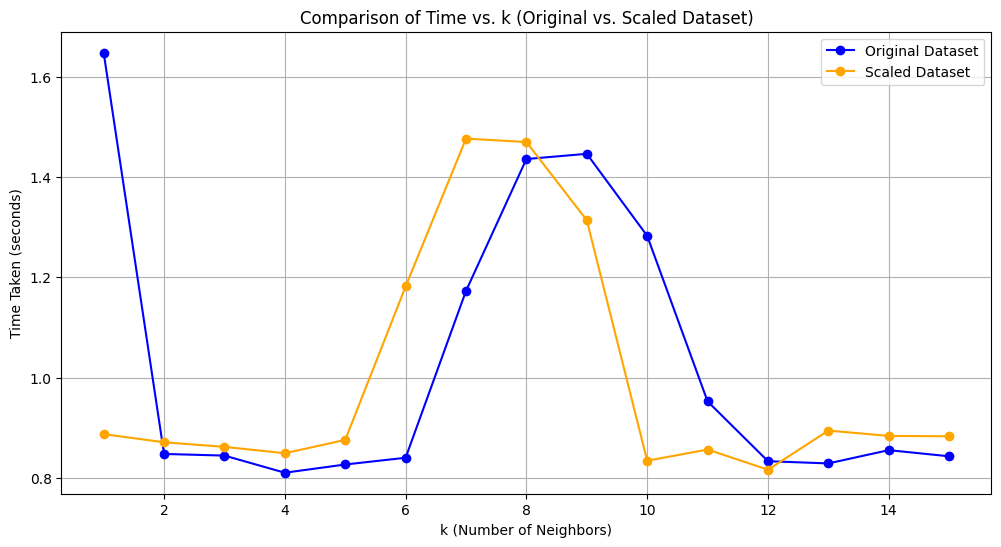

Optimal k for original dataset: 13
Optimal k for scaled dataset: 15
Scaling did not significantly improve the performance of KNN.


In [42]:
import time

def experiment_with_k(X_train, y_train, X_test, y_test, k_values, scaled=False):
    """
    Experiment with different values of k for the KNN algorithm.

    Arguments:
    X_train : np.ndarray
        Training feature matrix.
    y_train : np.ndarray
        Training labels.
    X_test : np.ndarray
        Test feature matrix.
    y_test : np.ndarray
        Test labels.
    k_values : list of int
        List of k values to experiment with.
    scaled : bool
        Whether the dataset is scaled (for labeling plots).

    Returns:
    dict
        A dictionary with k values as keys and a tuple of (accuracy, time taken) as values.
    """
    results = {}

    for k in k_values:
        start_time = time.time()
        predictions = knn_predict(X_test, X_train, y_train, k)
        elapsed_time = time.time() - start_time
        accuracy = compute_accuracy(y_test, predictions)
        results[k] = (accuracy, elapsed_time)
        print(f"k={k}: Accuracy={accuracy:.2f}%, Time={elapsed_time:.4f} seconds")


    plt.figure(figsize=(12, 5))
    plt.plot(k_values, [results[k][0] for k in k_values], marker='o', label="Accuracy")
    plt.xlabel("k (Number of Neighbors)")
    plt.ylabel("Accuracy (%)")
    plt.title(f"KNN Accuracy vs. k ({'Scaled' if scaled else 'Original'} Dataset)")
    plt.grid(True)
    plt.legend()
    plt.show()

    plt.figure(figsize=(12, 5))
    plt.plot(k_values, [results[k][1] for k in k_values], marker='o', color="red", label="Time")
    plt.xlabel("k (Number of Neighbors)")
    plt.ylabel("Time Taken (seconds)")
    plt.title(f"KNN Time vs. k ({'Scaled' if scaled else 'Original'} Dataset)")
    plt.grid(True)
    plt.legend()
    plt.show()

    return results

k_values = range(1, 16)  # k=1 to k=15
print("Experimenting on Original Dataset:")
results_original = experiment_with_k(X_train, y_train, X_test, y_test, k_values, scaled=False)

print("\nExperimenting on Scaled Dataset:")
results_scaled = experiment_with_k(X_train_scaled, y_train, X_test_scaled, y_test, k_values, scaled=True)

accuracies_original = [results_original[k][0] for k in k_values]
accuracies_scaled = [results_scaled[k][0] for k in k_values]
time_original = [results_original[k][1] for k in k_values]
time_scaled = [results_scaled[k][1] for k in k_values]

plt.figure(figsize=(12, 6))
plt.plot(k_values, accuracies_original, marker='o', label="Original Dataset", color='blue')
plt.plot(k_values, accuracies_scaled, marker='o', label="Scaled Dataset", color='orange')
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Accuracy (%)")
plt.title("Comparison of Accuracy vs. k (Original vs. Scaled Dataset)")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(k_values, time_original, marker='o', label="Original Dataset", color='blue')
plt.plot(k_values, time_scaled, marker='o', label="Scaled Dataset", color='orange')
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Time Taken (seconds)")
plt.title("Comparison of Time vs. k (Original vs. Scaled Dataset)")
plt.legend()
plt.grid(True)
plt.show()

optimal_k_original = k_values[np.argmax(accuracies_original)]
optimal_k_scaled = k_values[np.argmax(accuracies_scaled)]

print(f"Optimal k for original dataset: {optimal_k_original}")
print(f"Optimal k for scaled dataset: {optimal_k_scaled}")

if max(accuracies_scaled) > max(accuracies_original):
    print("Scaling improved the overall performance of KNN.")
else:
    print("Scaling did not significantly improve the performance of KNN.")
